Desain Filter IIR Tradisional menggunakan Transformasi Bilinear

scipy.signal sepenuhnya mendukung desain filter digital IIR dari prototipe analog. Filter IIR seperti filter FIR, biasanya dirancang dengan mempertimbangkan persyaratan respons amplitudo. Kumpulan fungsi desain tersedia langsung dari scipy.signal untuk tujuan ini, khususnya fungsi scipy.signal.iirdesign(). Untuk membuat desain filter lowpass, highpass, bandpass, dan bandstop konsisten dengan modul fir_design_helper.py, maka ditulislah modul iir_design_helper.py. Gambar 2, di bawah ini, merinci bagaimana parameter respons amplitudo didefinisikan secara grafis.

In [ ]:
Image('300ppi/IIR_Lowpass_Highpass_Bandpass_Bandstop@300ppi.png',width='90%')

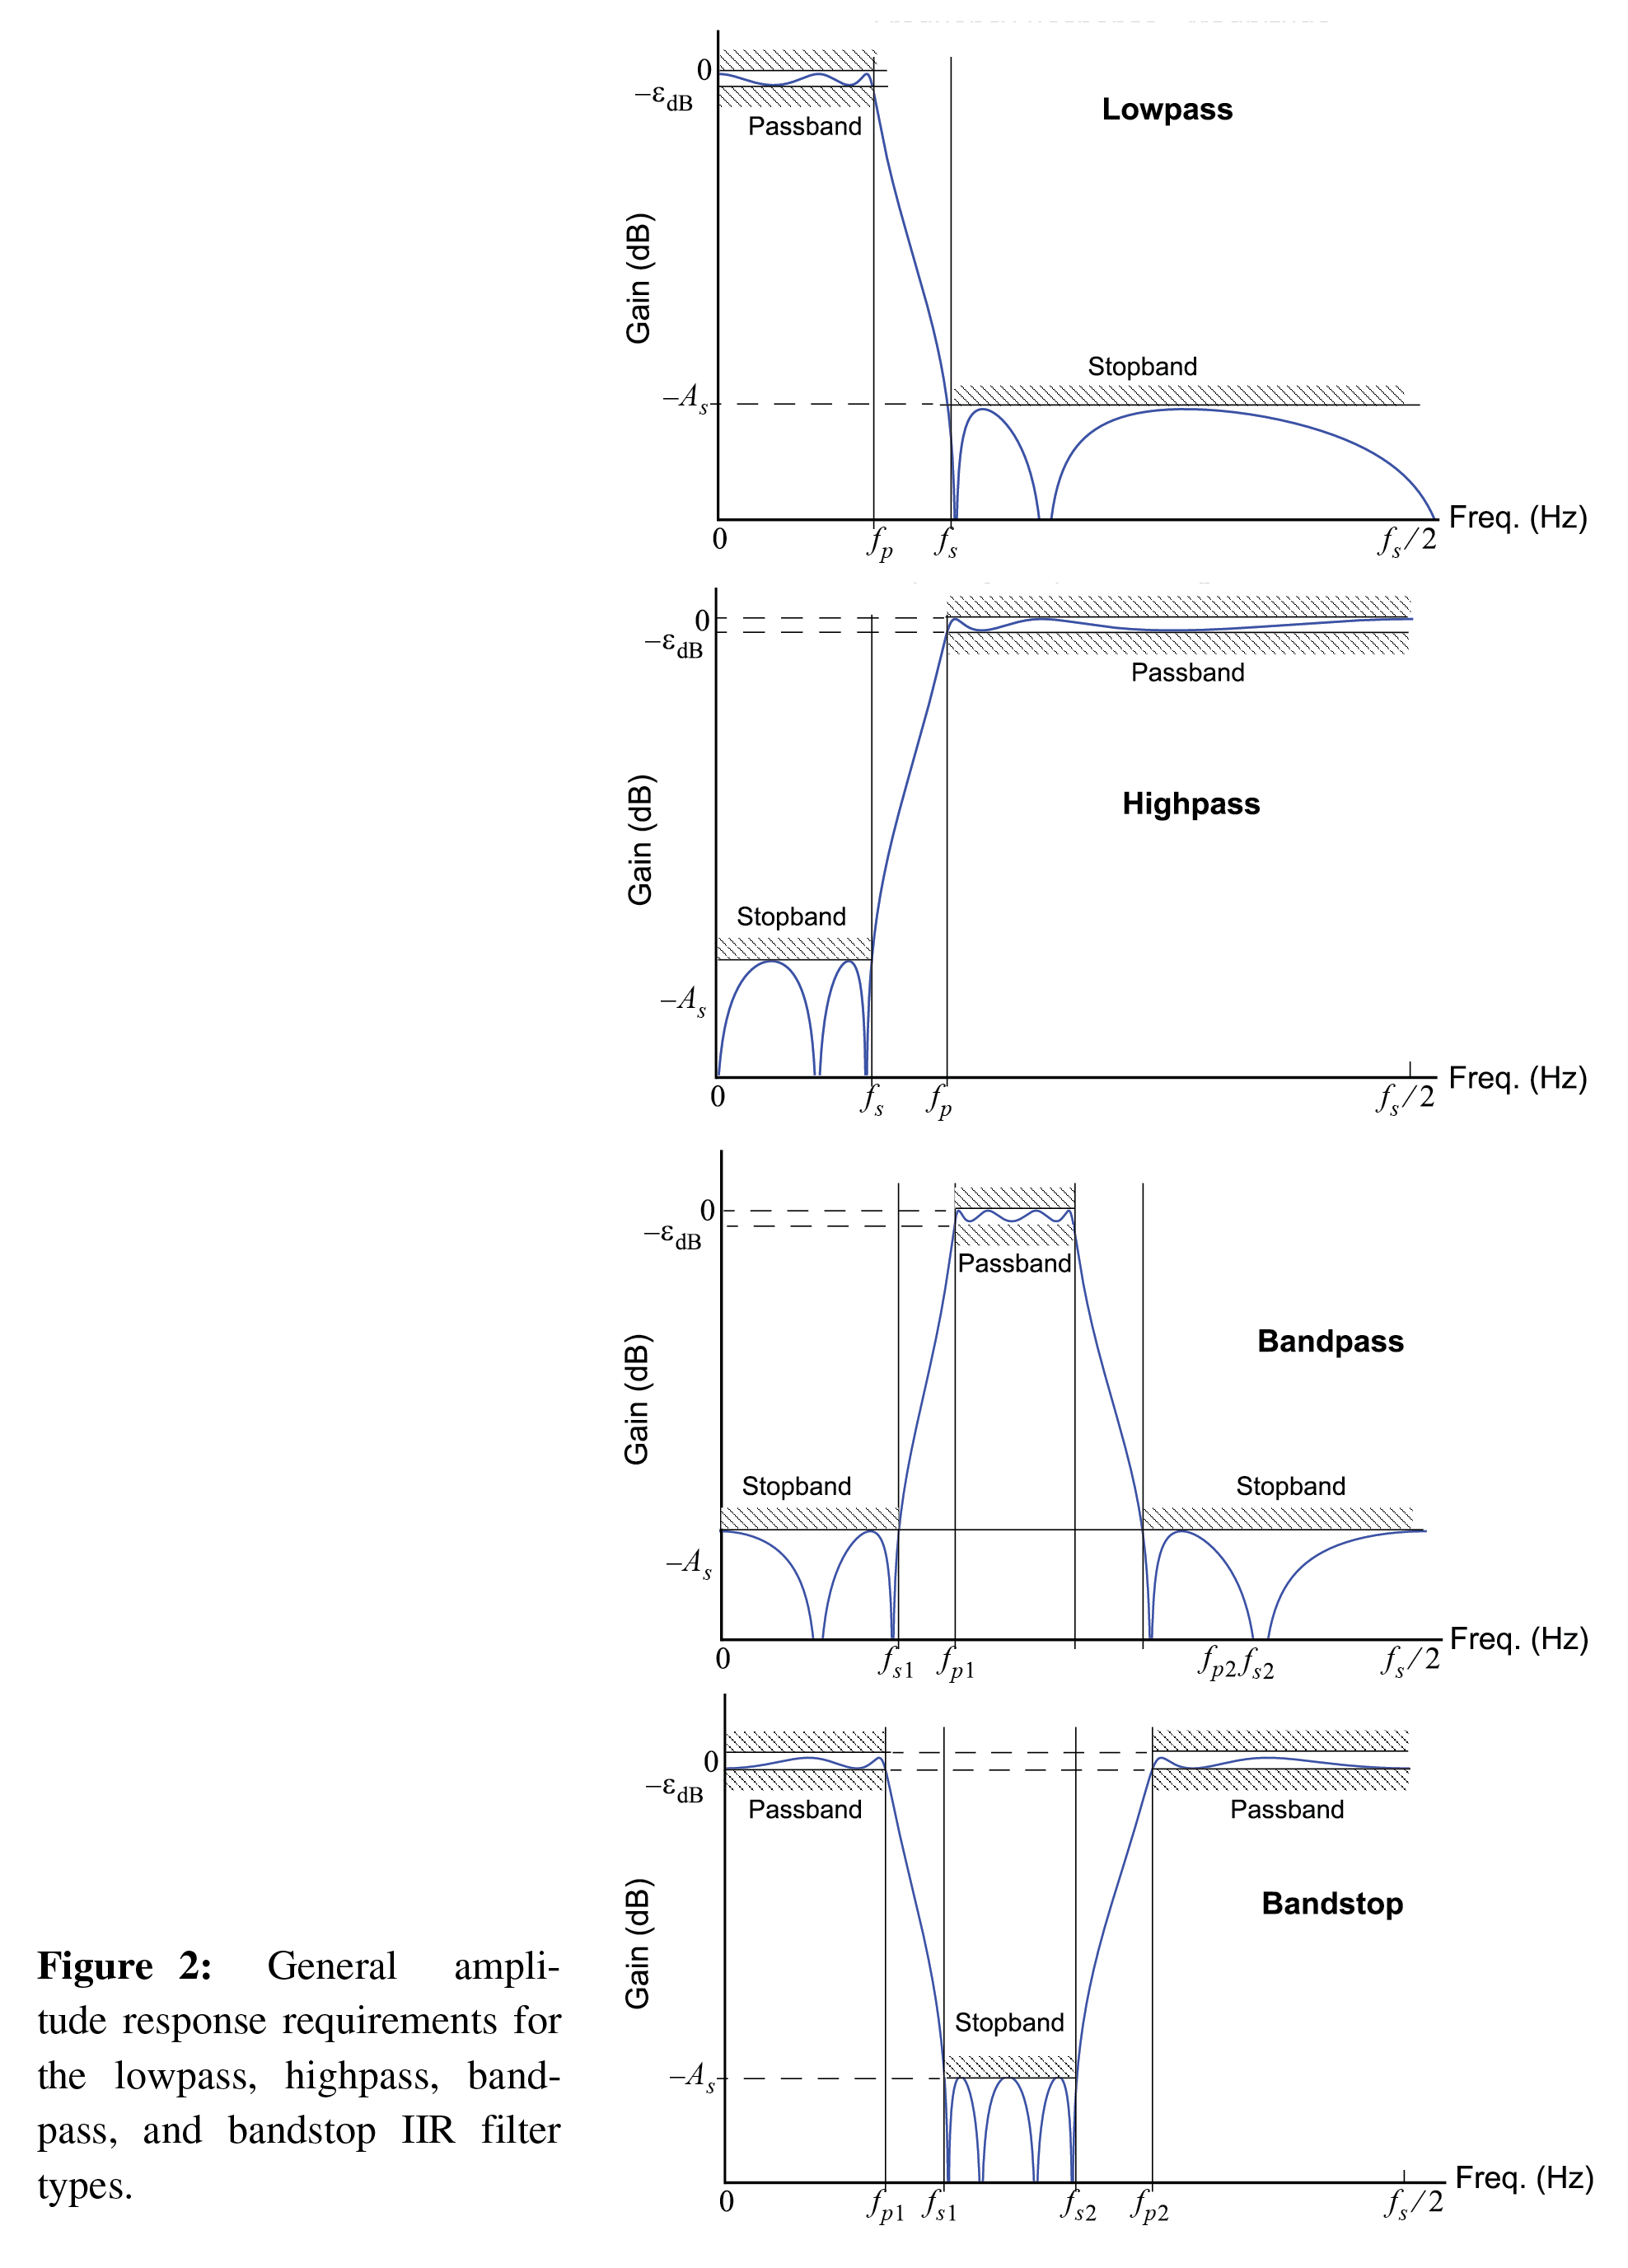

In [ ]:
Image('300ppi/IIR_Table@300ppi.png',width='80%')

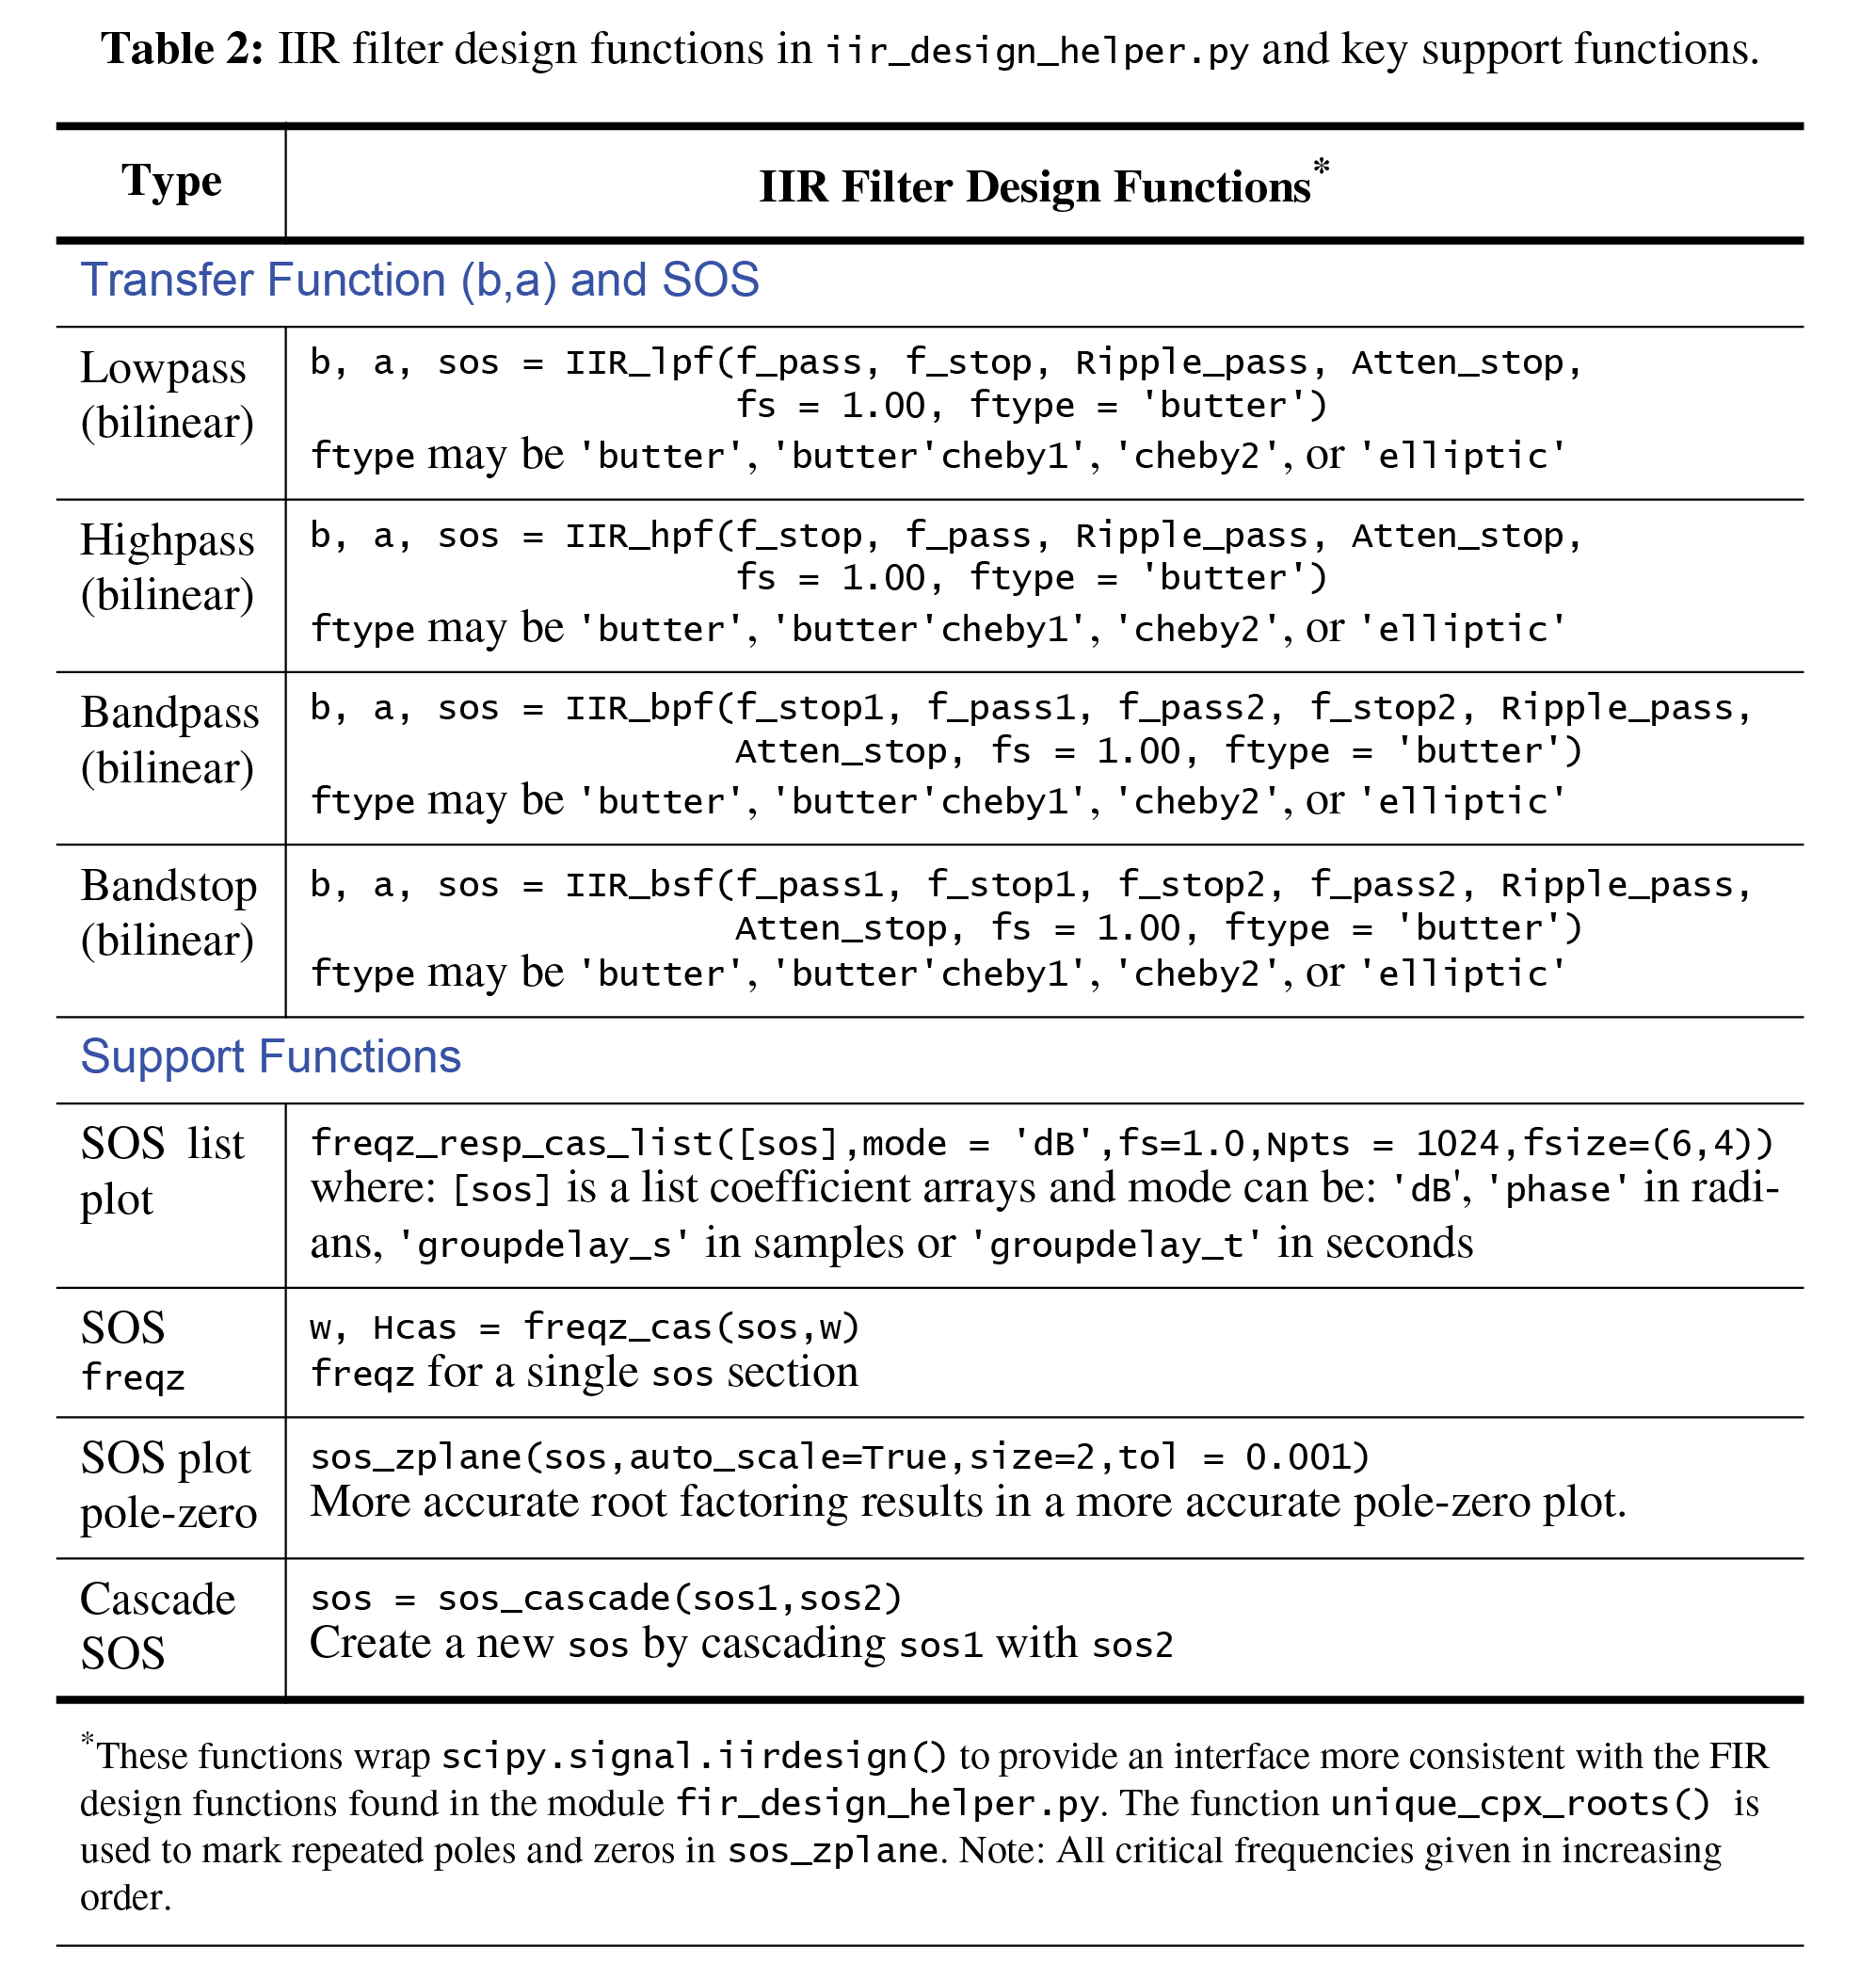

Fungsi filter mengembalikan koefisien filter dalam dua format:
1. Bentuk fungsi transfer tradisional sebagai koefisien pembilang b dan penyebut a larik koefisien, dan
2. Bentuk kaskade bagian biquadratik menggunakan larik atau matriks sos 2D yang telah diperkenalkan sebelumnya.
Keduanya disediakan untuk memungkinkan analisis lebih lanjut dengan topologi bentuk langsung atau bentuk sos. Fungsi signal.iirdesign() yang mendasari juga menyediakan opsi ketiga: daftar kutub dan nol. Bentuk sos diinginkan untuk filter presisi tinggi, karena lebih kuat terhadap kuantisasi koefisien, meskipun menggunakan koefisien presisi ganda dalam array b dan a.

Dari fungsi pendukung yang tersisa, empat fungsi juga dijelaskan pada Tabel 2 di atas. Fungsi yang paling signifikan adalah freqz_resp_cas_list, yang tersedia untuk membandingkan respons frekuensi secara grafis pada beberapa desain, dan sos_zplane, sebuah fungsi untuk memplot pola kutub-nol. Keduanya beroperasi menggunakan matriks sos. Bentuk fungsi transfer (b/a) untuk plotting respons frekuensi, freqz_resp_list, juga ada di dalam modul. Fungsi ini pertama kali diperkenalkan di bagian desain FIR. Plotting fungsi respons frekuensi menawarkan mode untuk penguatan dalam dB, fase dalam radian, penundaan grup dalam sampel, dan penundaan grup dalam detik, semuanya untuk laju sampling tertentu dalam Hz. Fungsi plotting pole-zero menempatkan pole dan nol lebih akurat daripada sk_dsp_commsigsys.zplane, karena fungsi numpy roots() hanya menyelesaikan polinomial kuadrat. Selain itu, akar-akar yang berulang dapat ditampilkan seperti yang diharapkan secara teoritis, dan juga dicatat dalam tampilan grafis dengan superskrip di sebelah penanda kutub dan nol.

Desain IIR Berdasarkan Transformasi Bilinear

Ada beberapa cara untuk mendesain filter IIR berdasarkan persyaratan respons amplitudo. Ketika keinginan untuk memiliki perkiraan filter mengikuti prototipe analog seperti Butterworth, Chebychev, dll., menggunakan transformasi bilinear. Fungsi signal.iirdesign() yang dijelaskan di atas melakukan hal ini.

Pada contoh di bawah ini kami mempertimbangkan persyaratan respons amplitudo lowpass dan melihat bagaimana urutan filter berubah ketika kami memilih prototipe analog yang berbeda.
Contoh: Perbandingan Desain Lowpass
Persyaratan respons amplitudo lowpass yang diberikan fs = 48kHz adalah:
fpass = 5kHz
fstop = 8kHz
Riak passband sebesar 0,5 dB
Redaman stopband sebesar 60 dB
Merancang empat filter untuk memenuhi persyaratan yang sama: butter, cheby1,, cheby2, dan ellip:

In [ ]:
fs = 48000
f_pass = 5000
f_stop = 8000
b_but,a_but,sos_but = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'butter')
b_cheb1,a_cheb1,sos_cheb1 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby1')
b_cheb2,a_cheb2,sos_cheb2 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby2')
b_elli,a_elli,sos_elli = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'ellip')

IIR butter order = 15.
IIR cheby1 order = 8.
IIR cheby2 order = 8.
IIR ellip order = 6.

Perbandingan Respons Frekuensi
Di sini membandingkan respons magnitudo dalam dB menggunakan bentuk sos dari masing-masing filter sebagai input. Elips adalah yang paling efisien, dan sebenarnya mencapai lebih dari itu dengan mencapai persyaratan stopband kurang dari 8 kHz.

In [ ]:
iir_d.freqz_resp_cas_list([sos_but,sos_cheb1,sos_cheb2,sos_elli],'dB',fs=48)
ylim([-80,5])
title(r'IIR Lowpass Compare')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Butter order: %d' % (len(a_but)-1),
        r'Cheby1 order: %d' % (len(a_cheb1)-1), 
        r'Cheby2 order: %d' % (len(a_cheb2)-1), 
        r'Elliptic order: %d' % (len(a_elli)-1)),loc='best')
grid();

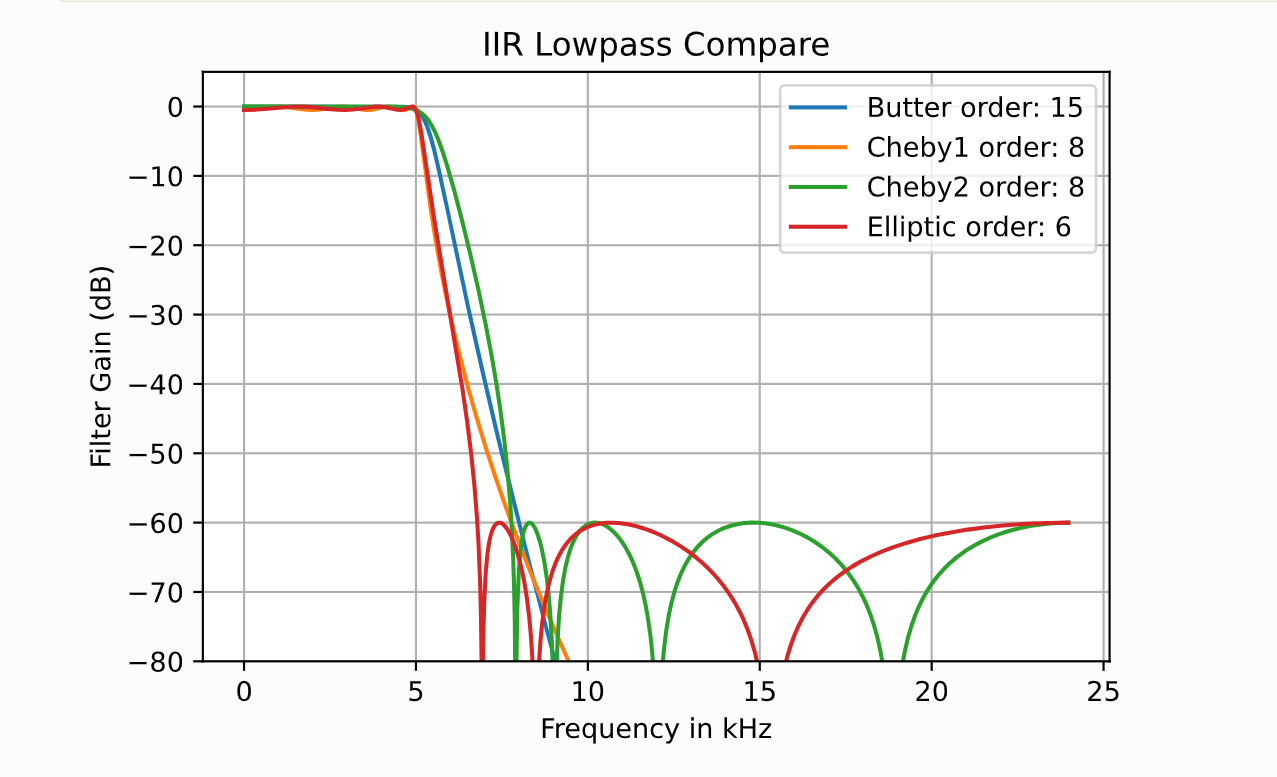

Selanjutnya plot konfigurasi pole-nol dari desain butterworth. Di sini menggunakan versi khusus ss.zplane yang bekerja dengan array sos 2D.

In [ ]:
iir_d.sos_zplane(sos_but)

(15, 15)

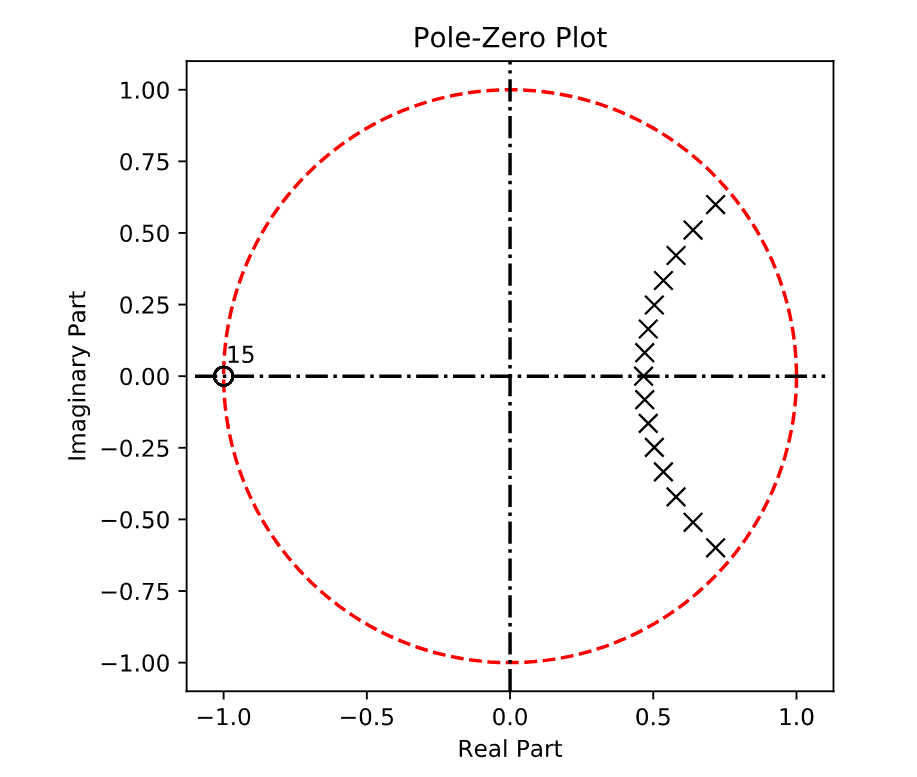

Perhatikan bahwa kedua plot di atas juga dapat diperoleh dengan menggunakan bentuk fungsi transfer melalui iir_d.freqz_resp_list([b],[a],'dB', fs=48) dan ss.zplane(b,a). Bentuk sos akan memberikan hasil yang lebih akurat, karena tidak terlalu sensitif terhadap kuantisasi koefisien. Hal ini terutama berlaku untuk plot pole-zero, karena pengakaran polinomial tingkat 15 jauh lebih rentan terhadap kesalahan daripada pengakaran kuadratik sederhana.

Untuk Butterworth orde 15, transformasi bilinear memetakan 15 domain nol yang diharapkan pada tak terhingga ke z=-1. Jika anda menggunakan sk_dsp_comm.sigsys.zplane(), anda akan menemukan bahwa 15 angka nol pada berada dalam lingkaran yang rapat di sekitar z=-1, yang mengindikasikan kesalahan pengakaran polinomial. Demikian juga respon frekuensi akan lebih akurat.

Pemfilteran sinyal dari ndarray x dilakukan dengan menggunakan desain filter yang dilakukan dengan menggunakan fungsi-fungsi dari scipy.signal:

1. Untuk bentuk fungsi transfer y = signal.lfilter(b,a,x)
2. Untuk bentuk sos y = signal.sosfilt(sos,x)

Desain Filter Setengah Band untuk Meloloskan hingga W/2 ketika fs = 8 kHz
Di sini kami mempertimbangkan desain lowpass yang perlu meloloskan frekuensi hingga fs/4. Khususnya ketika fs = 8000 Hz, band pass filter menjadi [0,2000] Hz. Setelah koefisien ditemukan, objek mrh.multirate dibuat untuk memungkinkan studi lebih lanjut tentang filter, dan pada akhirnya mengimplementasikan pemfilteran sinyal derau putih.

Mulailah dengan desain elips yang memiliki pita transisi yang berpusat pada 2000 Hz dengan riak passband 0,5 dB dan redaman stopband 80 dB. Lebar pita transisi diatur ke 100 Hz, dengan 50 Hz di kedua sisi 2000 Hz.

In [ ]:
# Elliptic IIR Lowpass
b_lp,a_lp,sos_lp = iir_d.IIR_lpf(1950,2050,0.5,80,8000.,'ellip')
mr_lp = mrh.multirate_IIR(sos_lp)

IIR ellip order = 11.
IIR filter order = 11

In [ ]:
mr_lp.freq_resp('db',8000)

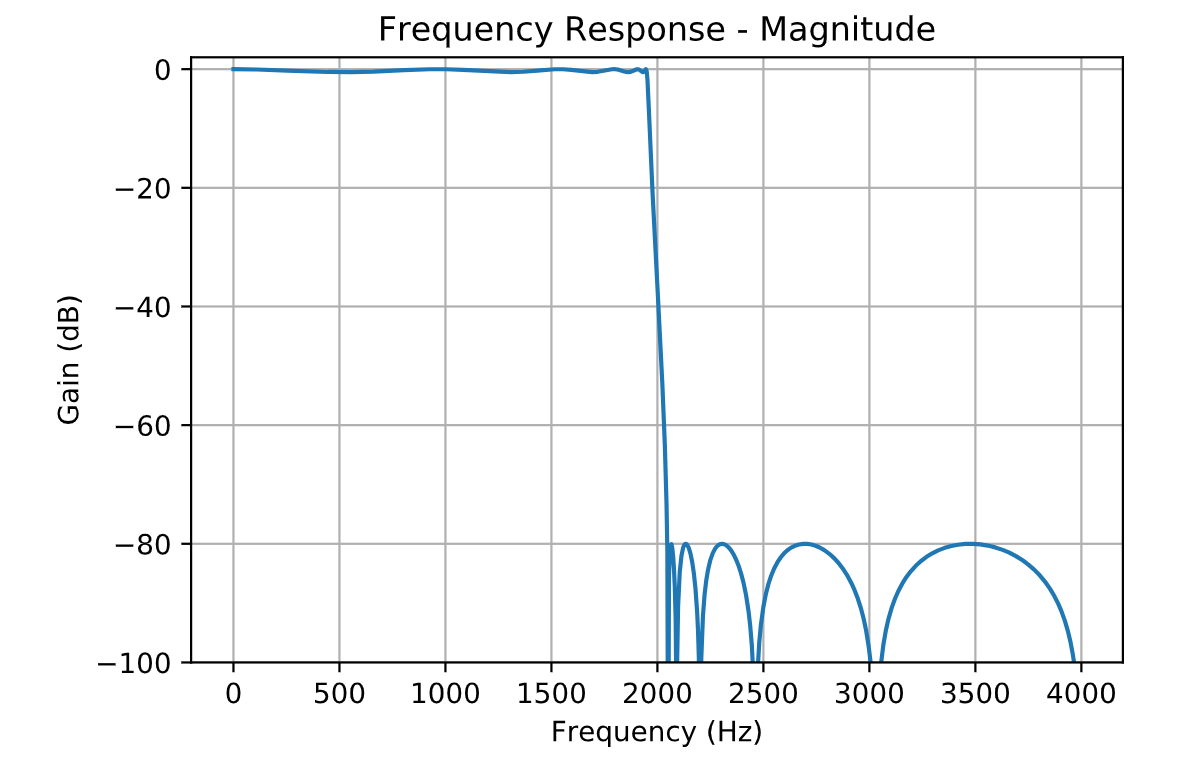

Masukkan derau putih Gaussian dengan varians σ2x = 1 melalui filter. Gunakan banyak sampel sehingga estimasi spektral dapat secara akurat membentuk Sy(f)=σ2x⋅|H(ej2πf/fs)|2=|H(ej2πf/fs)|2.

In [ ]:
x = randn(1000000)
y = mr_lp.filter(x)
psd(x,2**10,8000);
psd(y,2**10,8000);
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')
legend(('Input PSD','Output PSD'),loc='best')
ylim([-130,-30])

(-130, -30)

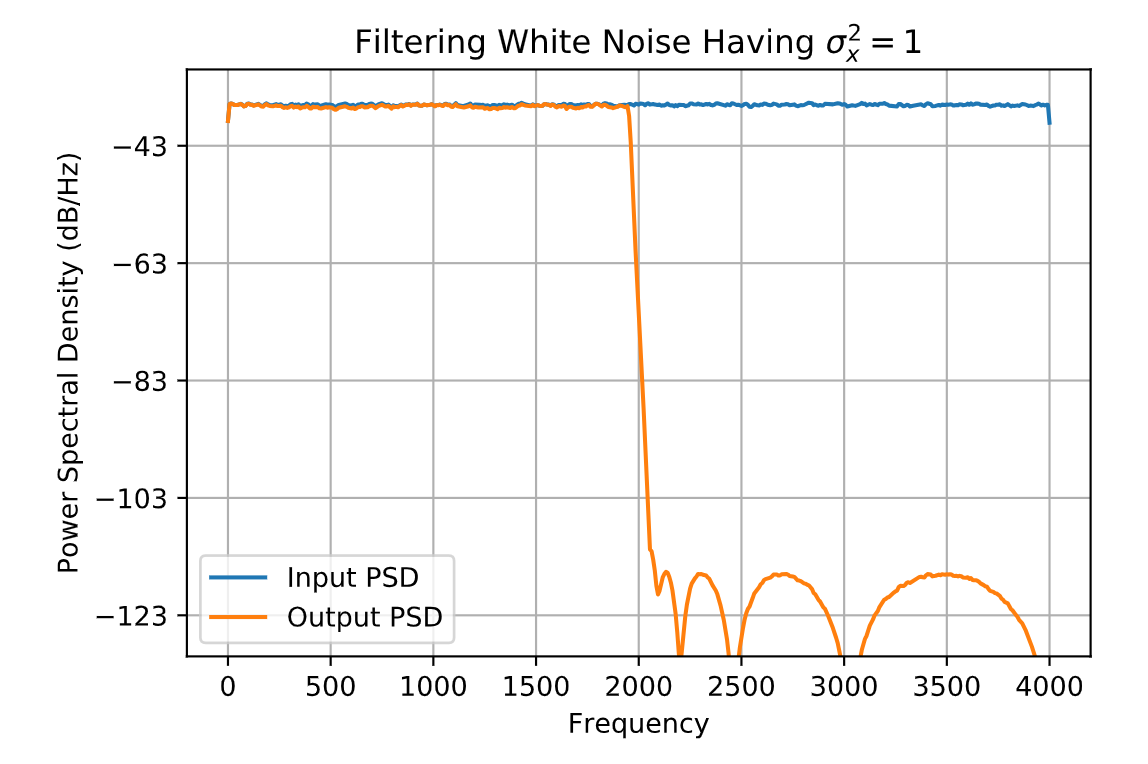

In [ ]:
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

PSD yang diharapkan sebesar -39,031 dB/Hz

Desain Bandpass Respons Amplitudo
Di sini kami mempertimbangkan desain bandpass FIR dan IIR untuk digunakan dalam demodulator SSB untuk menghilangkan potensi sinyal saluran yang berdekatan yang berada di kedua sisi pita frekuensi yang berjalan dari 23 kHz hingga 24 kHz.

In [ ]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)
ylim([-80, 5])
grid();

Keran filter Remez = 225.

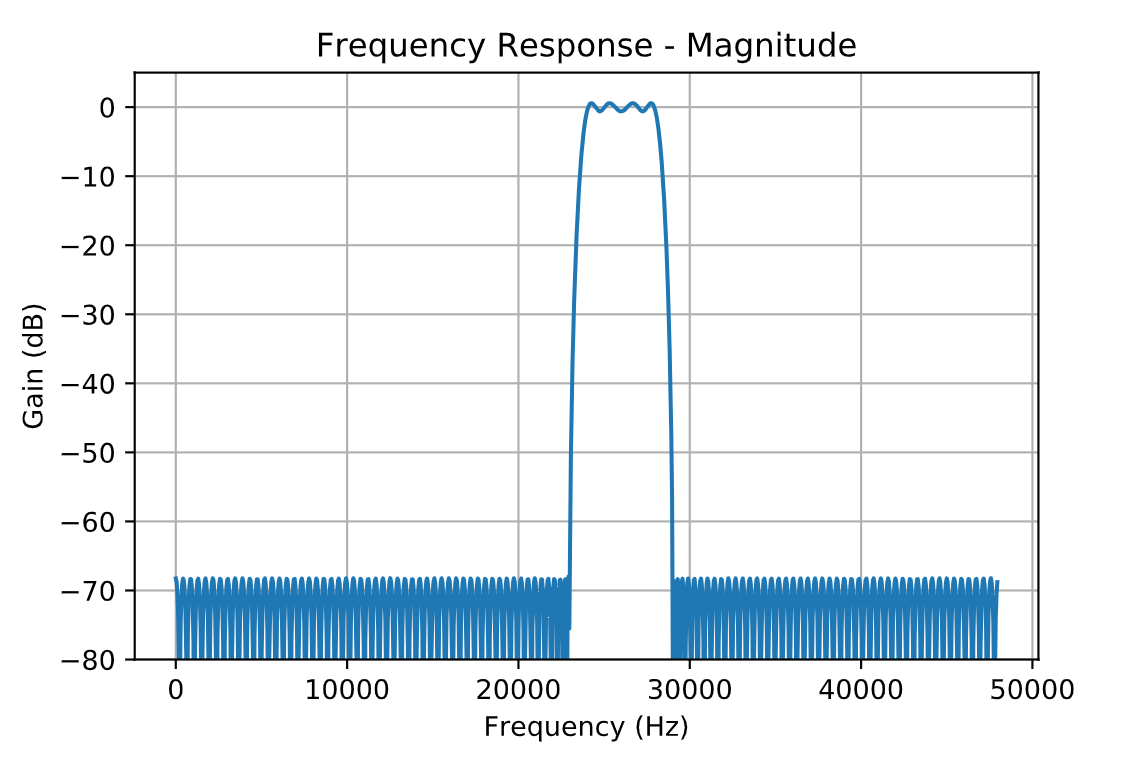

Penundaan grup adalah datar (konstan) karena desainnya memiliki fase linier.

b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)
grid();

Keran filter Remez = 225.

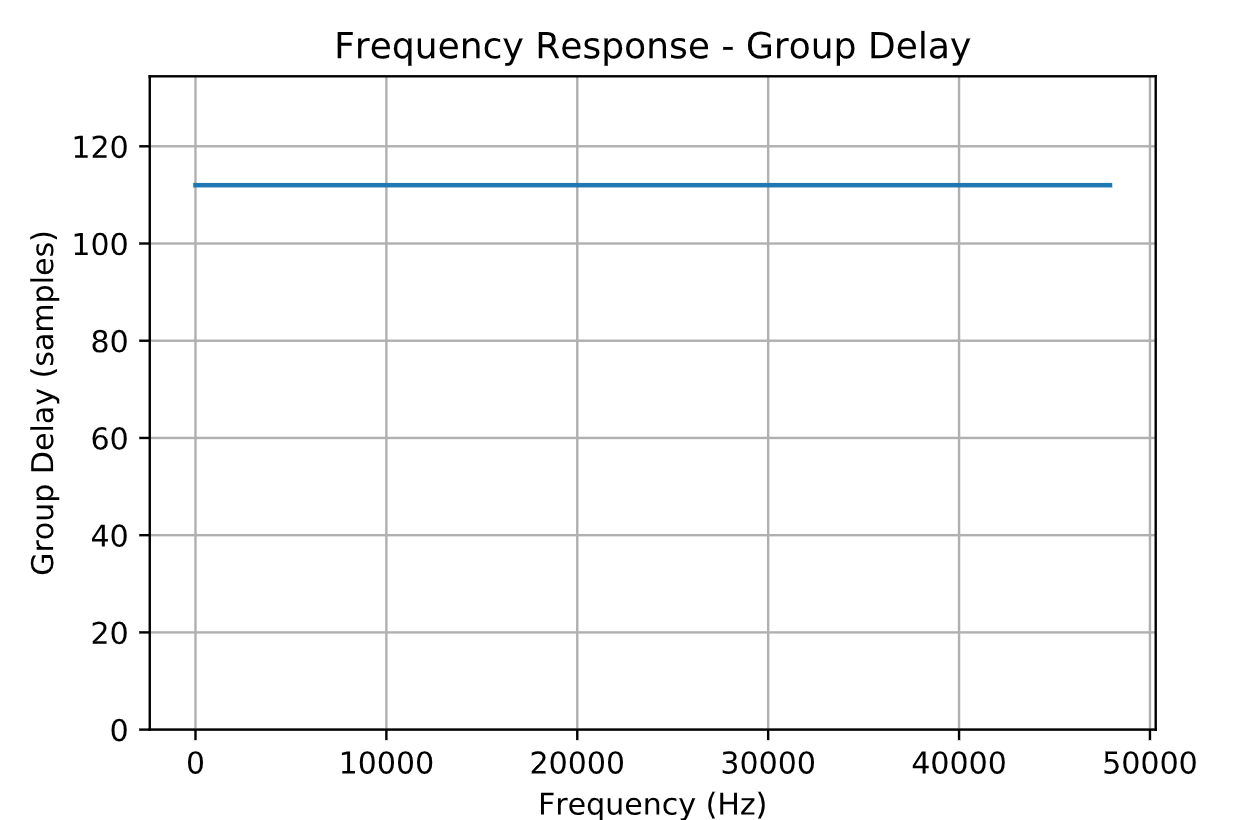

Bandingkan desain FIR dengan desain elips:

In [ ]:
b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                   0.5,70,96000,'ellip')
with np.errstate(divide='ignore'):
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)
ylim([-80, 5])
grid();

Urutan elips IIR = 14.

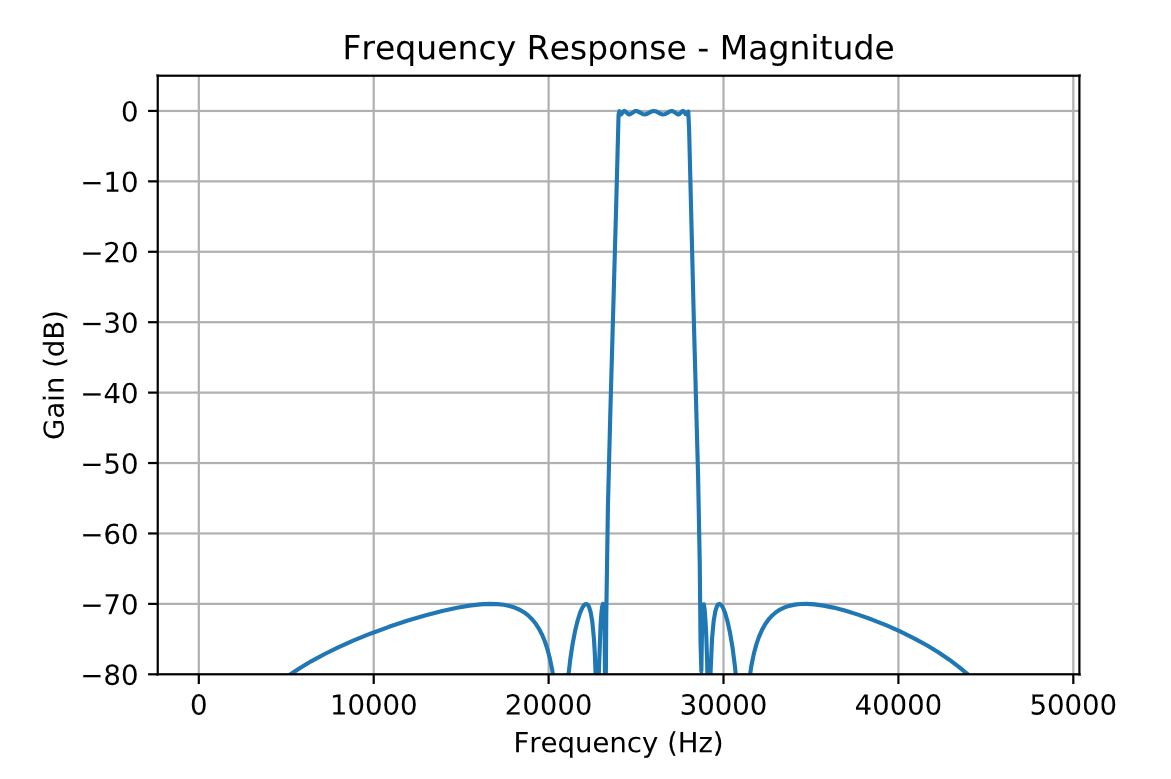

Elips orde tinggi ini memiliki respons amplitudo ketat yang bagus untuk koefisien minimal, tetapi penundaan grup sangat buruk:

In [ ]:
with np.errstate(divide='ignore', invalid='ignore'): #manage singularity warnings
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)
#ylim([-80, 5])
grid();

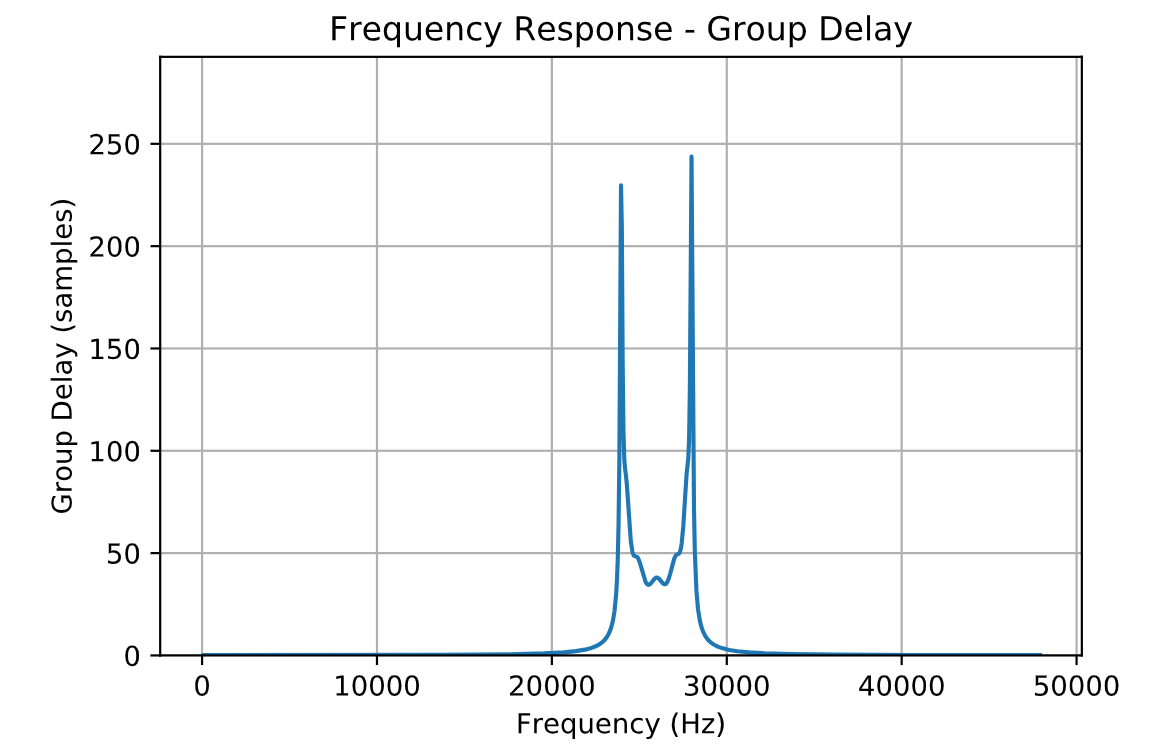